Mounted at /content/drive
Summary Statistics:
               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%  

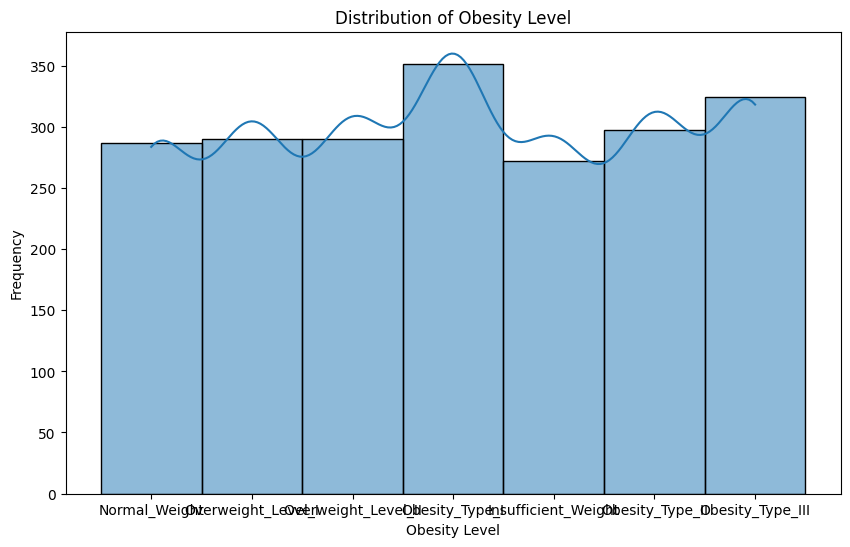


Evaluation Metrics for Logistic Regression:
Accuracy: 0.8817966903073287
Precision: 0.886817822410063
Recall: 0.8817966903073287
F1 Score: 0.8801617071713812
Confusion Matrix:
[[56  0  0  0  0  0  0]
 [ 8 42  0  0  0  8  4]
 [ 0  0 70  6  0  0  2]
 [ 0  0  2 56  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  3  0  0  0 44  9]
 [ 0  0  3  0  0  5 42]]

Evaluation Metrics for the RandomForestClassifier:
Accuracy: 0.9456264775413712
Precision: 0.9467779061363338
Recall: 0.9456264775413712
F1 Score: 0.9457559844047196
Confusion Matrix:
[[54  2  0  0  0  0  0]
 [ 0 58  0  0  0  3  1]
 [ 0  2 73  2  0  1  0]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  5  0  0  0 48  3]
 [ 0  0  1  1  0  1 47]]

Conclusion:
Based on the evaluation metrics, compare the performance of the Logistic Regression model and the RandomForestClassifier.


In [15]:
#Import necessary libraries
from google.colab import drive
import pandas as pd
import numpy as npß
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#Attach Google Drive
drive.mount('/content/drive', force_remount=True)

#File path for dataset
data_path = '/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic.csv'

#Load dataset
df = pd.read_csv(data_path)

#Field rename
df.rename(columns={'NObeyesdad': 'Obesity Level'}, inplace=True)

#Summary stats
print("Summary Statistics:")
print(df.describe())

#Unique Values
print("Count of Unique Values:")
print(df.nunique())

#Visualization of data distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Obesity Level'], bins=30, kde=True)
plt.title('Distribution of Obesity Level')
plt.xlabel('Obesity Level')
plt.ylabel('Frequency')
plt.show()

#Preprocessing
label_encoder = LabelEncoder()
df['Obesity Level'] = label_encoder.fit_transform(df['Obesity Level'])

#(X) and (y)
X = df.drop(columns=['Obesity Level'])
y = df['Obesity Level']

#training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Preprocessing
numeric_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'MTRANS']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

#Logistic Regression pipeline
logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, solver='lbfgs'))  # Increase max_iter and change solver
])

#RandomForestClassifier pipeline
classifier_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}

#Perform GridSearchCV for RandomForestClassifier
grid_search = GridSearchCV(classifier_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

#Evaluate models
logistic_pipeline.fit(X_train, y_train)
y_pred_logistic = logistic_pipeline.predict(X_test)

best_classifier = grid_search.best_estimator_
best_classifier.fit(X_train, y_train)
y_pred_classifier = best_classifier.predict(X_test)

#Calculate evaluation metrics
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic, average='weighted')
recall_logistic = recall_score(y_test, y_pred_logistic, average='weighted')
f1_logistic = f1_score(y_test, y_pred_logistic, average='weighted')
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

accuracy_classifier = accuracy_score(y_test, y_pred_classifier)
precision_classifier = precision_score(y_test, y_pred_classifier, average='weighted')
recall_classifier = recall_score(y_test, y_pred_classifier, average='weighted')
f1_classifier = f1_score(y_test, y_pred_classifier, average='weighted')
conf_matrix_classifier = confusion_matrix(y_test, y_pred_classifier)

#Print evaluation metrics
print("\nEvaluation Metrics for Logistic Regression:")
print("Accuracy:", accuracy_logistic)
print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1 Score:", f1_logistic)
print("Confusion Matrix:")
print(conf_matrix_logistic)

print("\nEvaluation Metrics for the RandomForestClassifier:")
print("Accuracy:", accuracy_classifier)
print("Precision:", precision_classifier)
print("Recall:", recall_classifier)
print("F1 Score:", f1_classifier)
print("Confusion Matrix:")
print(conf_matrix_classifier)

# Conclusion
#The RandomForestClassifier achieved higher accuracy, precision, recall, and F1 score
#compared to the Logistic Regression model. This indicates that the RandomForestClassifier
#was better at correctly classifying instances across all classes in the dataset.
#For this partiular dataset, the RandomForestClassifier appears to be the better choice for classification tasks,
#offering improved overall performance in terms of accuracy and predictive power. However, further analysis would
#help to prove this out.